In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as un
import astropy
%matplotlib inline

import pandas as pd
from pyproj import Proj, Transformer
import utm

In [2]:
data=pd.read_excel('ska.xlsx',usecols=[2,3])

In [4]:
data

,Unnamed: 2,Unnamed: 3
0,Longitude,Latitude
1,116.764448,-26.824722
2,116.76554,-26.825982
3,116.76392,-26.824005
4,116.765123,-26.825198
...,...,...
509,116.453122,-26.601151
510,116.452556,-26.600975
511,116.453024,-26.600811
512,116.452198,-26.600761


In [5]:
data.values[2:]

array([[116.7655399, -26.82598212],
       [116.7639199, -26.82400458],
       [116.7651234, -26.82519844],
       ...,
       [116.4530242, -26.60081122],
       [116.4521976, -26.60076065],
       [116.4525843, -26.60061336]], dtype=object)

In [11]:
centre=data.values[2:298]

In [12]:
center=data.values[1:2]

In [13]:
center[:,1][0], center[:,0][0]

(-26.82472208, 116.7644482)

In [14]:
latlon_data=data.values[2:298]
center=data.values[1:2]

latitudes = latlon_data[:, 1]
longitudes = latlon_data[:, 0]

utm_coords = utm.from_latlon(center[:,1][0], center[:,0][0])
utm_zone_number = utm_coords[2]



wgs84 = Proj(proj='latlong', datum='WGS84')
utm_proj = Proj(proj='utm', zone=utm_zone_number, datum='WGS84')


transformer_to_utm = Transformer.from_proj(wgs84, utm_proj)


origin_easting, origin_northing = transformer_to_utm.transform(center[:,0][0], center[:,1][0])


def latlon_to_utm_relative(lat, lon):
    easting, northing = transformer_to_utm.transform(lon, lat)
    return easting - origin_easting, northing - origin_northing


relative_coords = np.array([latlon_to_utm_relative(lat, lon) for lat, lon in zip(latitudes, longitudes)])

#relative_coords


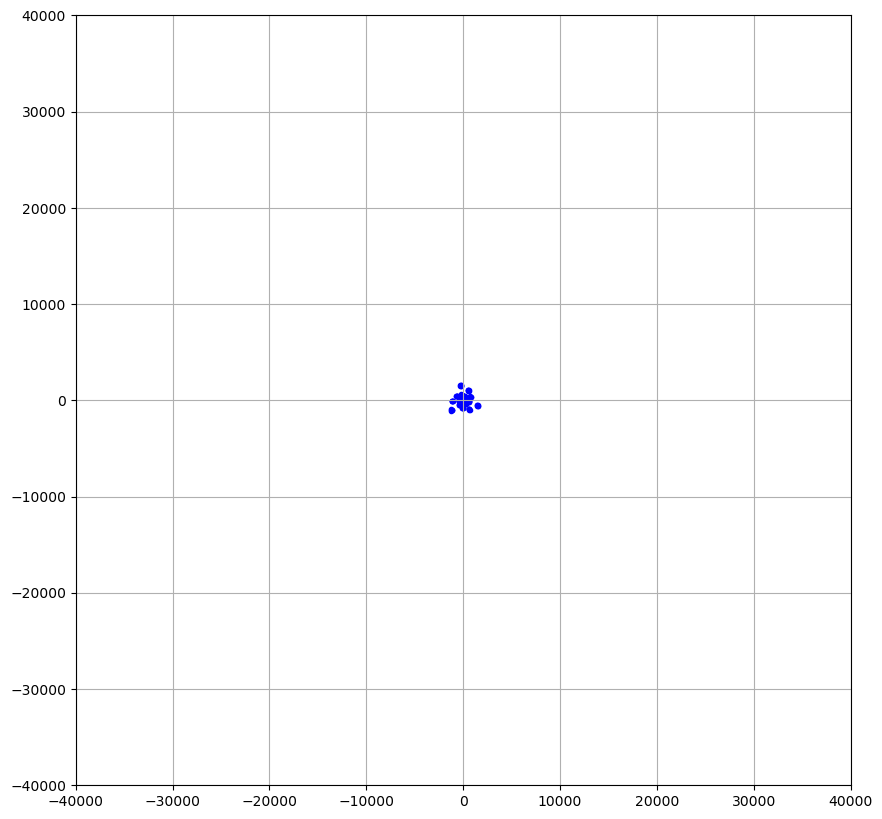

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(relative_coords[:, 0], relative_coords[:, 1], c='blue', marker='.')
plt.ylim(-40000,40000)
plt.xlim(-40000,40000)
plt.grid(True)
plt.show()

In [16]:
np.savetxt('ska_centre.txt',relative_coords)

In [17]:
p=np.loadtxt('ska_centre.txt')

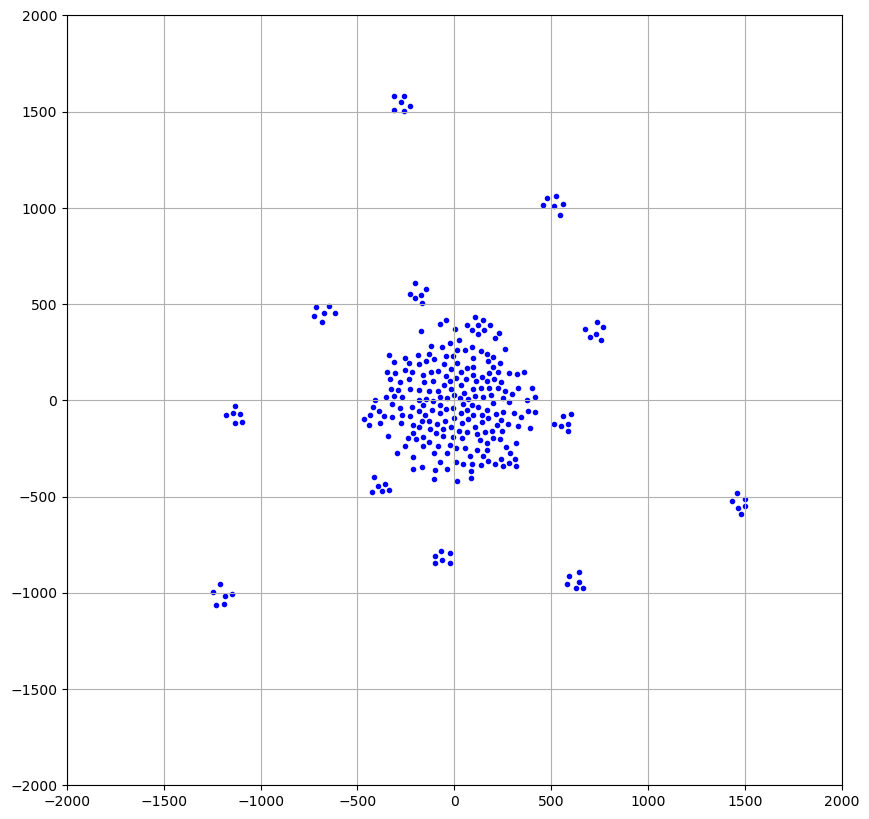

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(p[:, 0], p[:, 1], c='blue', marker='.')
plt.ylim(-2000,2000)
plt.xlim(-2000,2000)
plt.grid(True)
plt.show()

In [19]:
zeros_column = np.zeros((p.shape[0], 1),dtype=int)

In [20]:
p3= np.hstack((p, zeros_column))